<center>
<img src="../../img/ods_stickers.jpg" />
    
## [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 
## <center >  Tutorial: Statistical Hypothesis Testing in Python  
#### <center >Author: Kirill Panin, @Kirill Panin  

 TOC:  
[Statistical Hypothesis Tests](#hyptests):  
  * [Normality Tests](#normality_t):  
      * [Shapiro-Wilk Test](#norm1)
      * [D’Agostino’s K^2 Test](#norm2)
      * [Anderson-Darling Test](#norm3)
      * [Visual Normality Checks](#norm4):  
          * [Histogram](#histplot)
          * [QQplot](#qqplot)
  * [Correlation Tests](#cor_t):
      * [Pearson’s Correlation Coefficient](#cor1)
      * [Spearman’s Rank Correlation](#cor2)
      * [Kendall’s Rank Correlation](#cor3)
  * [Parametric Statistical Hypothesis Tests](#par_t)
      * [Student’s t-test](#par1)
      * [Paired Student’s t-test](#par2)
      * [Analysis of Variance Test (ANOVA)](#par3)
  * [Nonparametric Statistical Hypothesis Tests](#non_param_t)
      * [Mann-Whitney U Test](#nonpar1)
      * [Wilcoxon Signed-Rank Test](#nonpar2)
      * [Kruskal-Wallis H Test](#nonpar3)
      * [Friedman Test](#nonpar4)
      * [Kolmogorov–Smirnov Test](#nonpar5)
    

## Introduction
Hypothesis Testing so important for Data Scientist, because you should know how to check distributions and relations between data.

In this tutorial, we will learn statistical hypothesis tests that you may need to use in your machine learning career. And after completing this tutorial, you will know how testing hypothesis for:  
  
  * _types of hypothesis tests_
  * _normality checking_
  * _relationships checking between variables_
  * _differences between samples_
  * _how to interpret the test result_
  * _ how to implement the test using the Python_
  

In this tutorial, you discovered the key statistical hypothesis tests that you may need to use in a machine learning project.

Specifically, you learned:

The types of tests to use in different circumstances, such as normality checking, relationships between variables, and differences between samples. The key assumptions for each test and how to interpret the test result. How to implement the test using the Python

## Interpretation of a Test  
Before you can apply the statistical tests, you must know how to interpret the results.

Each test will return at least two things:

* __Statistic:__ A quantity calculated by the test that can be interpreted in the context of the test via comparing it to critical values from the distribution of the test statistic.
* __$p-value$:__ Used to interpret the test, in first case wheher the sample will drawn from a Gaussian distribution.  

Each test calculates a test-specific statistic. This statistic can aid in the interpretation of the result, although it may require a deeper proficiency with statistics and a deeper knowledge of the specific statistical test. Instead, the _p-value_ can be used to quickly and accurately interpret the statistic in practical applications.

At first part we'll be testing data that the sample was drawn from a Gaussian distribution. Technically this is called the null hypothesis, or H0. A threshold level is chosen called alpha, typically 5% (or 0.05), that is used to interpret the p-value. Interpret the p value as follows:  

* __$p <= alpha$__: reject H0, not normal.  
* __$p > alpha$__: fail to reject H0, normal.  

This means that, in general, __we are seeking results with a larger p-value to confirm that our sample was likely drawn from a Gaussian distribution__.

A result above 5% __DOESN'T MEAN__ that the null hypothesis is __true__. It means that it is very likely true given available evidence. The p-value is not the probability of the data fitting a Gaussian distribution; it can be thought of as a value that helps us interpret the statistical test.

## Generating Test Data <a id='gd'></a>

In [152]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [161]:
normal = np.random.standard_normal(1000)  # Draw random samples from a normal (Gaussian) distribution.
uniform = np.random.uniform(size=1000)
log_normal = np.random.lognormal(size=1000)

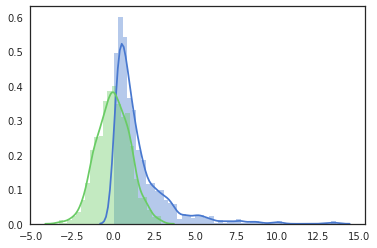

In [175]:
sns.distplot(log_normal);sns.distplot(normal);

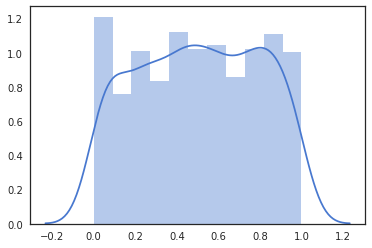

In [176]:
sns.distplot(uniform);

## Statistical Hypothesis Tests<a id='hyptests'></a>

### Normality Tests <a id='normality_t'></a>
This section lists statistical tests that you can use to check if your data has a Gaussian distribution.

### Shapiro-Wilk Test  <a id='norm1'></a>

Tests whether a data sample has a Gaussian distribution(Normal).

Assumptions

Observations in each sample are independent and identically distributed (iid).  
Interpretation

* H0: the sample has a Gaussian distribution.  
* H1: the sample does not have a Gaussian distribution.  

Returns the test statistic and the p-value.

In [88]:
from scipy.stats import shapiro
shapiro(normal), shapiro(log_normal)

((0.9985584020614624, 0.5931937098503113),
 (0.6438806056976318, 2.709410580772034e-41))

More information:
 * [scipy.stats.shapiro](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html)

### D’Agostino’s $K^2$ Test <a id='norm2'></a>
The D’Agostino’s K^2 test calculates summary statistics from the data, namely kurtosis and skewness, to determine if the data distribution departs from the normal distribution, named for Ralph D’Agostino.

* __Skew__ is a quantification of how much a distribution is pushed left or right, a measure of asymmetry in the distribution.
* __Kurtosis__ quantifies how much of the distribution is in the tail. It is a simple and commonly used statistical test for normality.  

The D’Agostino’s K^2 test is available via the normaltest() SciPy function and returns the test statistic and the p-value.

The complete example of the D’Agostino’s K^2 test on the dataset is listed below.

In [98]:
from scipy.stats import normaltest
stat, p = normaltest(normal)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.829, p=0.661
Sample looks Gaussian (fail to reject H0)


In [147]:
from scipy.stats import normaltest
stat, p = normaltest(log_normal)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=787.383, p=0.000
Sample does not look Gaussian (reject H0)


More information:
 * [scipy.stats.normaltest](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html)

###  Anderson-Darling Test <a id='norm3'></a>

* H0: the sample has a Gaussian distribution.  
* H1: the sample does not have a Gaussian distribution.

In [112]:
from scipy.stats import anderson
result = anderson(normal)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 0.378
15.000: 0.574, data looks normal (fail to reject H0)
10.000: 0.653, data looks normal (fail to reject H0)
5.000: 0.784, data looks normal (fail to reject H0)
2.500: 0.914, data looks normal (fail to reject H0)
1.000: 1.088, data looks normal (fail to reject H0)


In [111]:
from scipy.stats import anderson
result = anderson(uniform)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 12.495
15.000: 0.574, data does not look normal (reject H0)
10.000: 0.653, data does not look normal (reject H0)
5.000: 0.784, data does not look normal (reject H0)
2.500: 0.914, data does not look normal (reject H0)
1.000: 1.088, data does not look normal (reject H0)


More information:
 * [scipy.stats.anderson](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html)

###  Visual Normality Checks <a id='norm4'></a>

#### Histogram Plot <a id='histplot'></a>
A simple and commonly used plot to quickly check the distribution of a sample of data is the histogram. A sample of data has a Gaussian distribution of the histogram plot, showing the familiar bell shape.

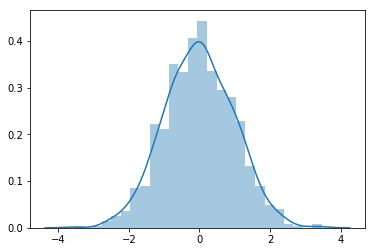

In [149]:
#Histogram Plot Gaussian distribution
sns.distplot(normal);

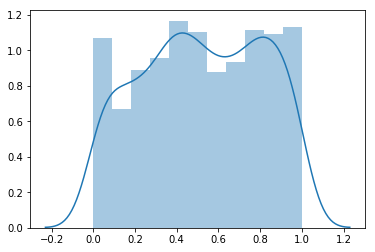

In [150]:
#Histogram Plot Uniform distribution
sns.distplot(uniform);

#### Quantile-Quantile Plot <a id='qqplot'></a>
Another popular plot for checking the distribution of a data sample is the quantile-quantile plot, Q-Q plot, or QQ plot for short.

This plot generates its own sample of the idealized distribution that we are comparing with, in this case the Gaussian distribution. The idealized samples are divided into groups (e.g. 5), called quantiles. Each data point in the sample is paired with a similar member from the idealized distribution at the same cumulative distribution.

The resulting points are plotted as a scatter plot with the idealized value on the x-axis and the data sample on the y-axis.

A perfect match for the distribution will be shown by a line of dots on a 45-degree angle from the bottom left of the plot to the top right. Often a line is drawn on the plot to help make this expectation clear. Deviations by the dots from the line shows a deviation from the expected distribution.

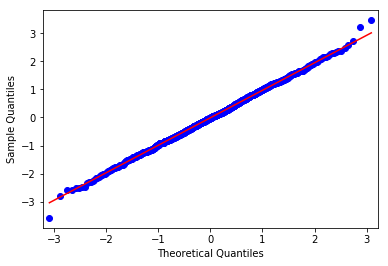

In [158]:
import statsmodels.api as sm
from matplotlib import pyplot as plt
fig = sm.qqplot(normal, line='s')
plt.show()  # Gaussian distribution

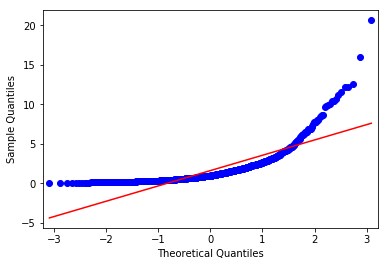

In [160]:
fig = sm.qqplot(log_normal, line='s')
plt.show()  # Log Normal distribution

## Correlation Tests <a id='cor_t'></a>
This section lists statistical tests that you can use to check if two samples are related.

In [55]:
x = np.random.normal(0,1,1000)
y = (3 * x) - np.random.normal(0,2,1000)

###  Pearson’s Correlation Coefficient <a id='cor1'></a>
Tests whether two samples have a linear relationship.  
* H0: the two samples are independent.
* H1: there is a dependency between the samples.

In [56]:
from scipy.stats import pearsonr
corr, p = pearsonr(x, y)
corr, p

(0.8207236708707059, 7.2042131600280555e-245)

More information:
 * [scipy.stats.pearsonr](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html)


### Spearman’s Rank Correlation  <a id='cor2'></a>
Tests whether two samples have a monotonic relationship. Observations in each sample can be ranked.
* H0: the two samples are independent.
* H1: there is a dependency between the samples.

In [57]:
from scipy.stats import spearmanr
corr, p = spearmanr(x, y)
corr, p

(0.8076902436902438, 3.2834508833351045e-231)

More information:
 * [scipy.stats.spearmanr](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html)

###  Kendall’s Rank Correlation <a id='cor3'></a> 
Tests whether two samples have a monotonic relationship. Like in previous

In [58]:
from scipy.stats import kendalltau
corr, p = kendalltau(x, y)
corr, p

(0.6135895895895896, 1.3595289338753751e-185)

More information:
 * [scipy.stats.kendalltau](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kendalltau.html)

## Parametric Statistical Hypothesis Tests <a id='par_t'></a>
This section lists statistical tests that you can use to compare data samples. Parametric statistical methods often mean those methods that assume the data samples have a Gaussian distribution.  Parametric statistical significance tests that quantify the difference between the means of two or more samples of data.



For __parametric statistical tests__ assume that a data sample was drawn from a specific population distribution.

They often refer to statistical tests that assume the Gaussian distribution. Because it is so common for data to fit this distribution, parametric statistical methods are more commonly used.

A typical question we may have about two or more samples of data is whether they have the same distribution. Parametric statistical significance tests are those statistical methods that assume data comes from the same Gaussian distribution, that is a data distribution with the same mean and standard deviation: the parameters of the distribution.

The p-value can be thought of as the probability of observing the two data samples given the base assumption (null hypothesis) that the two samples were drawn from a population with the same distribution.

__p <= alpha__: reject null hypothesis, different distribution.  
__p > alpha__: fail to reject null hypothesis, same distribution

x1: mean=20.042 stdv=3.046
x2: mean=21.002 stdv=2.913


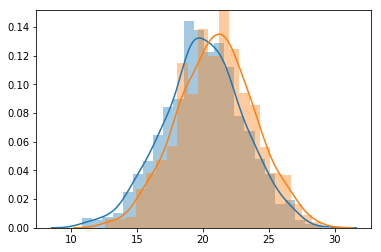

In [129]:
x1 = 3*np.random.randn(1000) + 20
x2 = 3*np.random.randn(1000) + 21
print('x1: mean=%.3f stdv=%.3f' % (np.mean(x1), np.std(x1)))
print('x2: mean=%.3f stdv=%.3f' % (np.mean(x2), np.std(x2)))
sns.distplot(x1);sns.distplot(x2);

### Student’s t-test <a id='par1'></a>
Tests whether the means of two independent samples are significantly different.
One of the most commonly used t tests is the independent samples t test. You use this test when you want to compare the means of two independent samples on a given variable

Assumptions

* Observations in each sample are independent and identically distributed (iid).
* Observations in each sample are normally distributed.
* Observations in each sample have the same variance.  

Interpretation

* H0: the means of the samples are equal.
* H1: the means of the samples are unequal.

In [134]:
from scipy.stats import ttest_ind
stat, p = ttest_ind(x1, x2)
print('P value:', p)
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

P value: 8.810726433096305e-13
Different distributions (reject H0)


The interpretation of the statistic finds that the sample means are different, with a significance of at least 5%.

More information:
 * [scipy.stats.ttest_ind](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)


### Paired Student’s t-test <a id='par2'></a>
Tests whether the means of two paired samples are significantly different. The paired Student’s t-test for quantifying the difference between the mean of two dependent data samples.

Assumptions

* Observations in each sample are independent and identically distributed (iid).
* Observations in each sample are normally distributed.
* Observations in each sample have the same variance.
* Observations across each sample are paired.

Interpretation

* H0: the means of the samples are equal.
* H1: the means of the samples are unequal.


In [136]:
from scipy.stats import ttest_rel
stat, p = ttest_rel(x1, x2)
print('P value:', p)
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

P value: 2.0798605083628403e-12
Different distributions (reject H0)


The interpretation of the result suggests that the samples have different means and therefore different distributions

More information:
 * [scipy.stats.ttest_ind](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html)  
 * [Wikipedia](https://en.wikipedia.org/wiki/Student%27s_t-test)


#  Analysis of Variance Test (ANOVA) <a id='par3'></a> 
Tests whether the means of two or more independent samples are significantly different. The ANOVA and repeated measures ANOVA for checking the similarity or difference between the means of 2 or more data samples.

* H0: the means of the samples are equal.
* H1: one or more of the means of the samples are unequal.

In [137]:
from scipy.stats import f_oneway
stat, p = f_oneway(x1, x2)
print('P value:', p)
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

P value: 8.810726433092936e-13
Different distributions (reject H0)


More information:
 * [scipy.stats.f_oneway](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html)  
 * [Wikipedia](https://en.wikipedia.org/wiki/Analysis_of_variance)

## Nonparametric Statistical Hypothesis Tests <a id='non_param_t'></a>

### Mann-Whitney U Test <a id='nonpar1'></a>
Tests whether the distributions of two independent samples are equal or not.

Assumptions

* Observations in each sample are independent and identically distributed (iid).
* Observations in each sample can be ranked.

Interpretation

* H0: the distributions of both samples are equal.
* H1: the distributions of both samples are not equal.

In [104]:
x = np.random.normal(0,1,1000)
y = np.random.uniform(0,1,1000)
z = np.random.uniform(0,1,1000)

In [105]:
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(y, z)
stat, p

(487929.0, 0.17496031527806138)

More information:
 * [scipy.stats.mannwhitneyu](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html)  
 * [Wikipedia](https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test)

### Wilcoxon Signed-Rank Test <a id='nonpar2'></a>
Tests whether the distributions of two paired samples are equal or not.

Assumptions

* Observations in each sample are independent and identically distributed (iid).
* Observations in each sample can be ranked.
* Observations across each sample are paired.  

Interpretation

* H0: the distributions of both samples are equal.
* H1: the distributions of both samples are not equal.

In [107]:
from scipy.stats import wilcoxon
stat, p = wilcoxon(z, y)
stat, p

(242703.0, 0.40874006794867135)

More information:
 * [scipy.stats.wilcoxon](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html)  
 * [Wikipedia](https://en.wikipedia.org/wiki/Wilcoxon_signed-rank_test)  

###  Kruskal-Wallis H Test <a id='nonpar3'></a> 
Tests whether the distributions of two or more independent samples are equal or not.

Assumptions

* Observations in each sample are independent and identically distributed (iid).
* Observations in each sample can be ranked.
Interpretation

* H0: the distributions of all samples are equal.
* H1: the distributions of one or more samples are not equal.

from scipy.stats import kruskal
z1 = np.random.uniform(0,1,1000)
stat, p = kruskal(y,z,z1)
stat, p

More information:
 * [scipy.stats.kruskal](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html)  
 * [Wikipedia](https://en.wikipedia.org/wiki/Kruskal%E2%80%93Wallis_one-way_analysis_of_variance)



### Friedman Test <a id='nonpar4'></a>
Tests whether the distributions of two or more paired samples are equal or not.

Assumptions

* Observations in each sample are independent and identically distributed (iid).
* Observations in each sample can be ranked.
* Observations across each sample are paired.

Interpretation

* H0: the distributions of all samples are equal.
* H1: the distributions of one or more samples are not equal.


In [115]:
from scipy.stats import friedmanchisquare
stat, p = friedmanchisquare(y,z,z1)
stat, p

(1.5500000000010914, 0.46070378099871445)

### Kolmogorov–Smirnov test <a id='nonpar5'></a>

Depends on what you want to determine. If you are interested in determining whether the distributions have the __same mean__, and don't care about the rest, then __K-S__ is not best. K-S is very good for determining whether two samples in essence come from the same population.

In [146]:
from scipy.stats import ks_2samp
import numpy as np

np.random.seed(123456)
x = np.random.normal(0, 1, 1000)
y = np.random.normal(0, 1, 1000)
z = np.random.normal(1.1, 0.9, 1000)

ks_2samp(x, y), ks_2samp(x, z)

(Ks_2sampResult(statistic=0.05300000000000002, pvalue=0.11677281598391273),
 Ks_2sampResult(statistic=0.449, pvalue=5.832321494731098e-89))

Under the null hypothesis the two distributions are identical. If the K-S statistic is small or the p-value is high (greater than the significance level, say 5%), then we cannot reject the hypothesis that the distributions of the two samples are the same. Conversely, we can reject the null hypothesis if the p-value is low.

More information:
 * [Wikipedia](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test)  

# Summary

In this tutorial, you discovered the key statistical hypothesis tests that you may need to use in a machine learning project.

Specifically, you learned:

The types of tests to use in different circumstances, such as normality checking, relationships between variables, and differences between samples.
The key assumptions for each test and how to interpret the test result.
How to implement the test using the Python 

## References

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats  
https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/  
https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/  